In [35]:
import numpy as np
from scipy.integrate import quad, dblquad
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

/home/fangchenli/miniconda3/envs/data/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


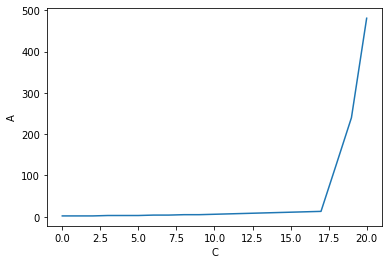

In [33]:
# Problem #1

alpha = 0.1
b = 10
C = np.arange(0, 21)

p_a = lambda a_in, b_in, c_in, n_in: \
    (np.exp(-(a_in+b_in)) * (a_in+b_in)**c_in) / np.math.factorial(c_in) * n_in

upper_limits = np.zeros_like(C)
for i, c in enumerate(C):
    
    # calculate the normalization factor
    n_inv = quad(p_a, 0, np.Inf, args=(b, c, 1))
    n = 1 / n_inv[0]
    
    # use function solver to find A
    func = lambda x: quad(p_a, x, np.Inf, args=(b, c, n))[0] - alpha
    upper_limits[i] = fsolve(func, np.array([0]))
    
plt.plot(C, upper_limits)
plt.xlabel('C')
plt.ylabel('A')
plt.show()

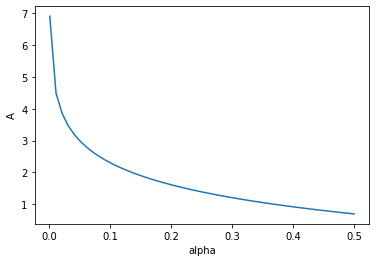

In [31]:
# Problem #2

b = 0
c = 0

p_a_special = lambda a_in: np.exp(-a_in)
n_inv = quad(p_a_special, 0, np.Inf)
n = 1 / n_inv[0]

alpha_line = np.linspace(0.001, 0.5)
a_values = -np.log(alpha_line/n)
plt.plot(alpha_line, a_values)
plt.xlabel('alpha')
plt.ylabel('A')
plt.show()


/home/fangchenli/miniconda3/envs/data/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/home/fangchenli/miniconda3/envs/data/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  


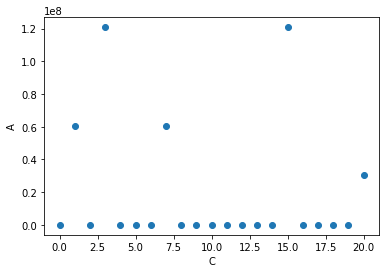

In [39]:
# Problem #3

alpha = 0.1
B = 10

p_a_bc = lambda a_in, b_in, c_in, b_in_cap, n_in: \
    (np.exp(-(a_in+b_in)) * (a_in+b_in)**c_in) / np.math.factorial(c_in) * \
    (np.exp(-b_in) * (b_in**b_in_cap)) / np.math.factorial(b_in_cap) * n_in 

upper_limits = np.zeros_like(C)
for i, c in enumerate(C):
    
    # calculate the normalization factor
    n_inv = dblquad(p_a_bc, 0, np.Inf, lambda x: 0, lambda x: np.Inf, args=(c, B, 1))
    n = 1 / n_inv[0]
    
    # use function solver to find A
    func = lambda y: dblquad(p_a_bc, y, np.Inf, lambda x: 0, lambda x: np.Inf, args=(c, B, n))[0] - alpha
    upper_limits[i] = fsolve(func, np.array([0]))

plt.scatter(C, upper_limits)
plt.xlabel('C')
plt.ylabel('A')
plt.show()